In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv


In [2]:
df = pd.read_csv("../input/red-wine-quality-cortez-et-al-2009/winequality-red.csv")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
print("Total Number of NULL VALUES:",df.isnull().sum().sum())

Total Number of NULL VALUES: 0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<AxesSubplot:xlabel='quality', ylabel='Count'>

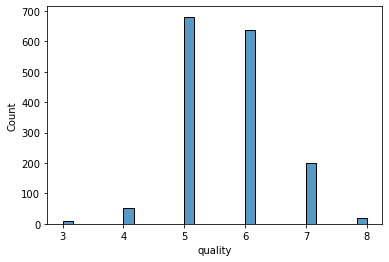

In [7]:
sns.histplot(df["quality"])

<AxesSubplot:>

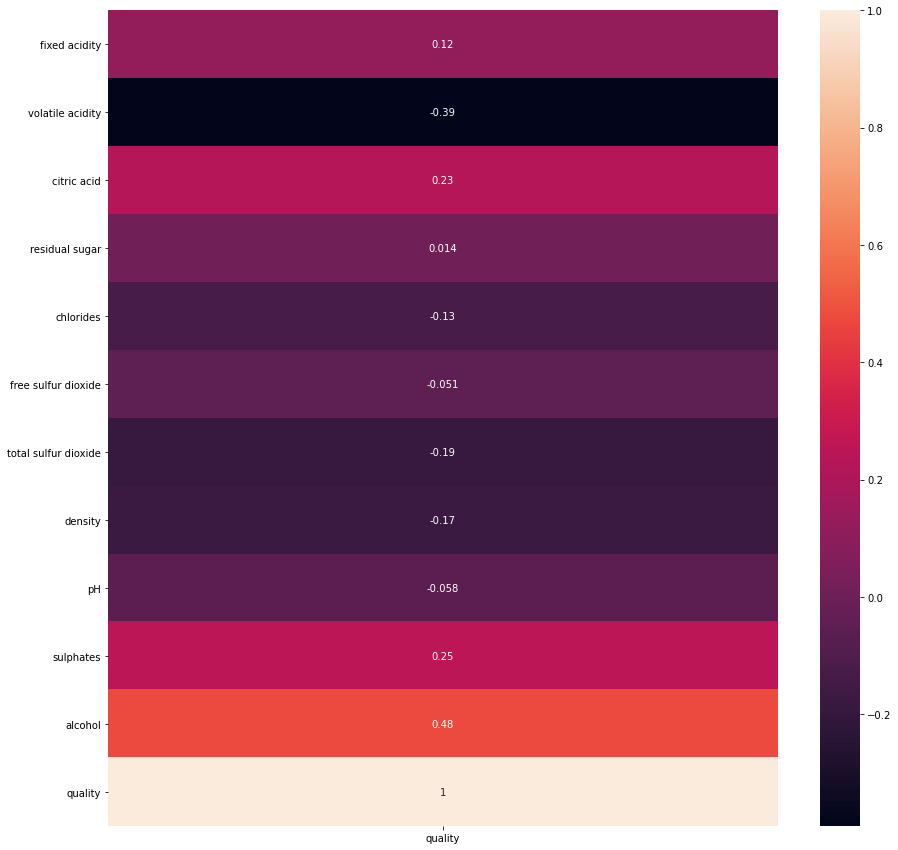

In [8]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr()["quality"].to_frame(),annot= True)

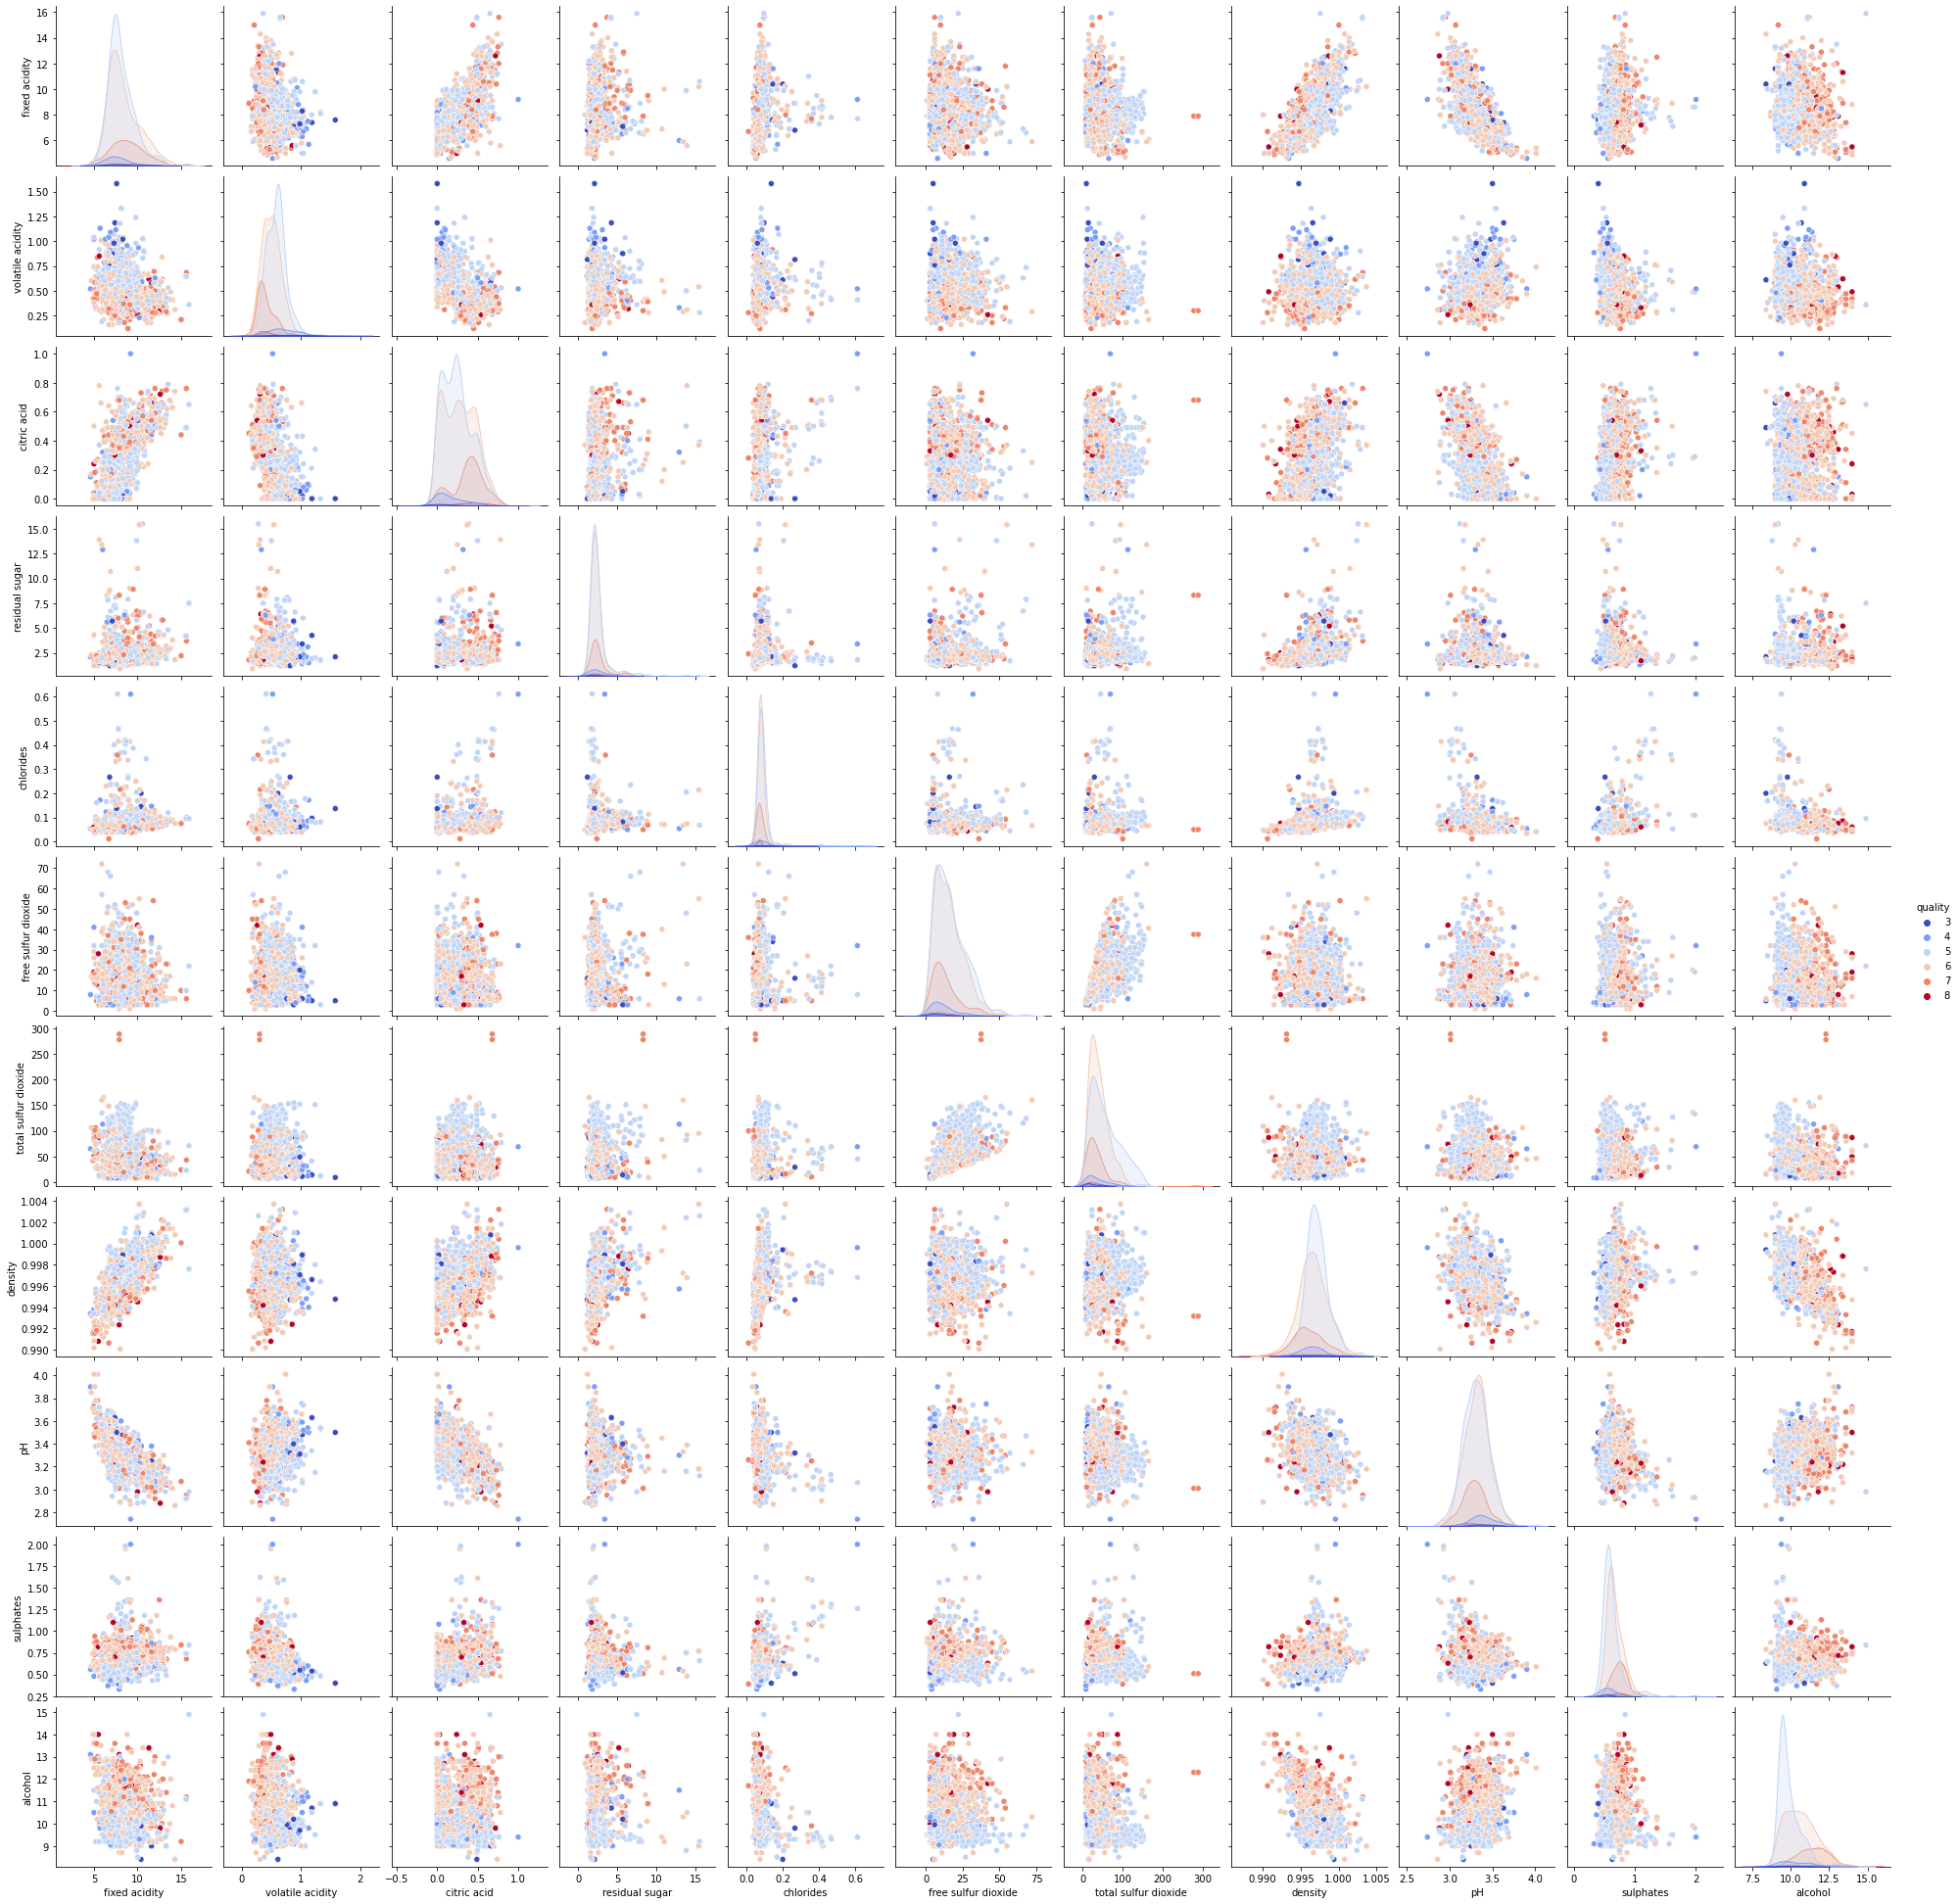

In [9]:
sns.pairplot(df,hue="quality",diag_kind="kde",palette="coolwarm")

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

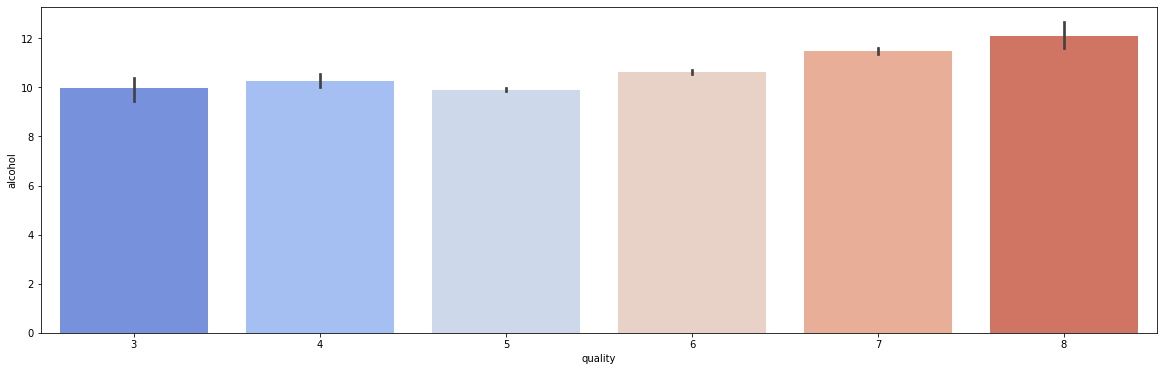

In [10]:
plt.figure(figsize=(20,6))
sns.barplot(y = df["alcohol"],x = df["quality"],palette="coolwarm")

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

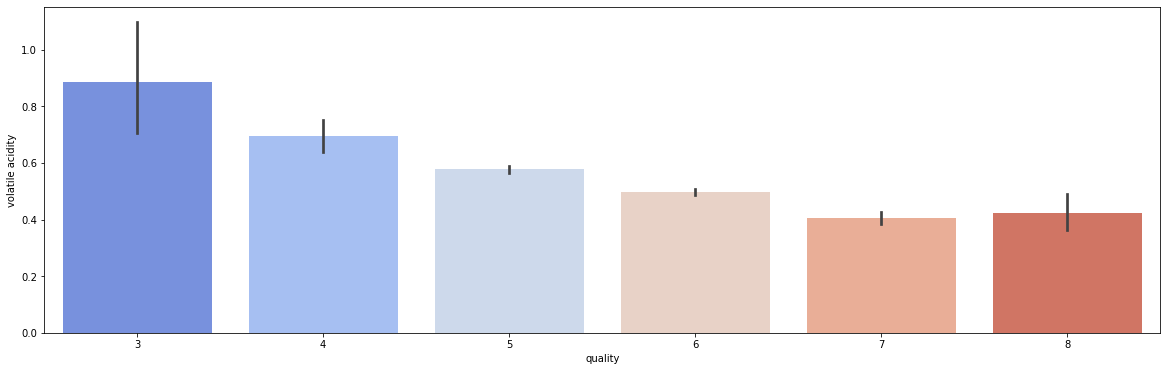

In [11]:
plt.figure(figsize=(20,6))
sns.barplot(y = df["volatile acidity"],x = df["quality"],palette="coolwarm")

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

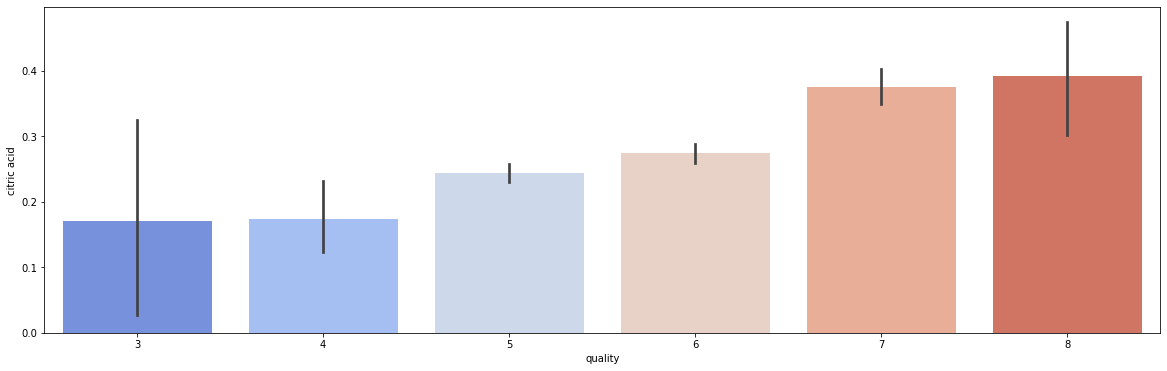

In [12]:
plt.figure(figsize=(20,6))
sns.barplot(y = df["citric acid"],x = df["quality"],palette="coolwarm")

<AxesSubplot:xlabel='volatile acidity', ylabel='alcohol'>

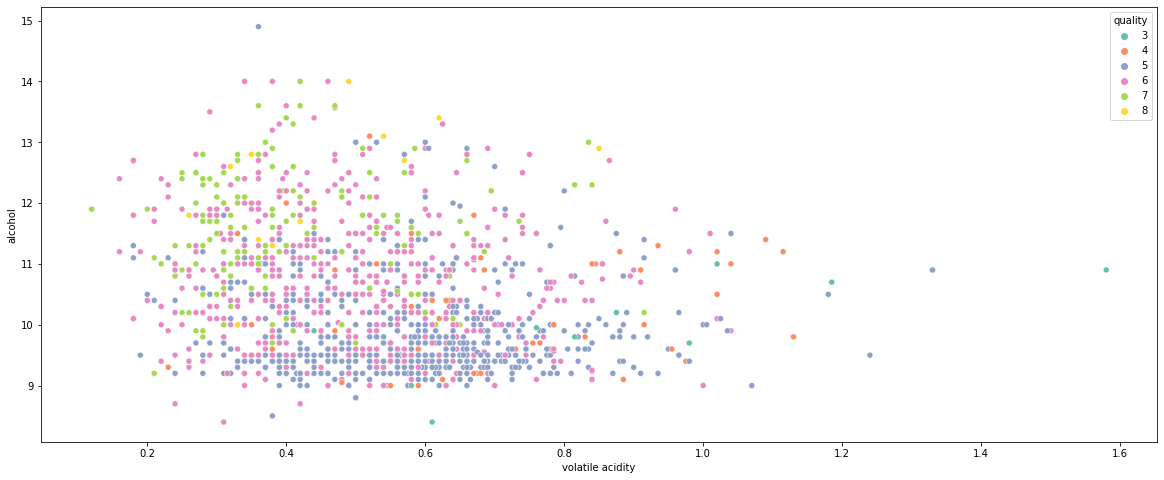

In [13]:
plt.figure(figsize=(20,8))
sns.scatterplot(y = df["alcohol"],x = df["volatile acidity"],hue = df["quality"],palette="Set2")

In [14]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

from sklearn.model_selection import train_test_split as tts
X_train,X_test,y_train,y_test = tts(X,y,test_size = 0.33,random_state = 0)

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(1071, 11) (528, 11) (1071,) (528,)


In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [16]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test,y_pred))

0.40795314317145853
